In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%cd /content/drive/'My Drive'/surface

/content/drive/My Drive/surface


In [ ]:
!ls

data.zip  steel_data


Archive:  data.zip
replace data/Crazing/Cr_1.bmp? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!ls

data.zip  steel_data


In [ ]:
import os
import sys
import pandas as pd
from sklearn.model_selection import train_test_split
import cv2
import glob
import numpy as np
import torch 
import torchvision
from fastai.callbacks import *
from fastai.vision import *
from fastai.metrics import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
bs = 32  #batch size
PATH = './steel_data'
sz = 224 #image dimentions

In [ ]:
classes = []
for d in os.listdir(PATH) :
    if os.path.isdir(os.path.join(PATH, d)) and not d.startswith('.'):
        if (d!='models'):
          classes.append(d) 
print ("There are ", len(classes), "classes:\n", classes) 

There are  6 classes:
 ['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']


In [ ]:
for c in classes:
    print ("Class:", c)
    verify_images(os.path.join(PATH, c), delete=True);

Class: Crazing


Class: Inclusion


Class: Patches


Process Process-11:
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.6/concurrent/futures/process.py", line 169, in _process_worker
    call_item = call_queue.get(block=True)
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 94, in get
    res = self._recv_bytes()
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt


KeyboardInterrupt: ignored

In [ ]:
bs = 32  #batch size
PATH = './steel_data'
sz = 224 #image dimentions
data  = ImageDataBunch.from_folder(PATH, ds_tfms=get_transforms(), size=sz, bs=bs, valid_pct=0.3).normalize(imagenet_stats)

In [ ]:
print ("Train Images: ", len(data.train_ds), " validation images: ", len(data.valid_ds) )

Train Images:  1260  validation images:  540


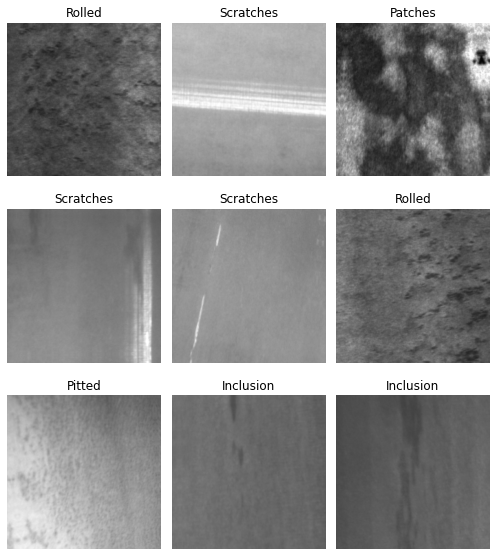

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

**Training using the Resnet18 architecture**

In [ ]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [ ]:
import time
start_time = time.time()
learn.fit_one_cycle(2,1e-01)
print("--- %s seconds ---" % (time.time() - start_time))


epoch,train_loss,valid_loss,accuracy,time
0,2.566185,34.742943,0.364815,05:26
1,1.420509,0.490980,0.957407,04:25


--- 591.7749226093292 seconds ---


inference_time   43.937973976135254


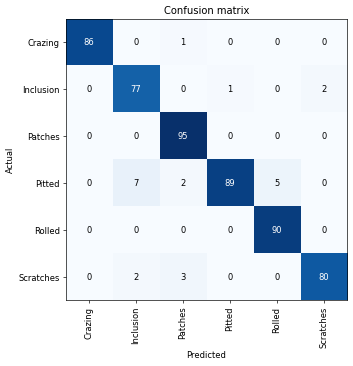

In [ ]:
from sklearn import metrics
start_time=time.time()
interp = ClassificationInterpretation.from_learner(learn)

print("inference_time"," ",time.time()-start_time)
interp.plot_confusion_matrix(figsize=(6,6), dpi=60)


Recall 0.9593766479362641
Precision 0.9579683271090541
f1_Score 0.9586719703054711


inference_time   43.538856983184814
ROC area is 0.9979347826086957


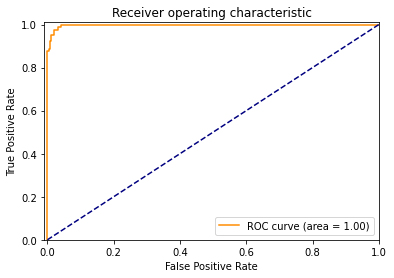

In [ ]:
conf=interp.confusion_matrix()
recall = np.diag(conf) / np.sum(conf, axis = 1)
precision = np.diag(conf) / np.sum(conf, axis = 0)
recall=np.mean(recall)
precision=np.mean(precision)
print("Recall",recall)
print("Precision",precision)
f1=2*((precision*recall)/(precision+recall))
print("f1_Score",f1)
from sklearn import metrics
start_time=time.time()
preds,y, loss = learn.get_preds(with_loss=True)
print("inference_time"," ",time.time()-start_time)
from sklearn.metrics import roc_curve, auc
# probs from log preds
probs = np.exp(preds[:,1])
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y, probs, pos_label=1)

# Compute ROC area
roc_auc = auc(fpr, tpr)
print('ROC area is {0}'.format(roc_auc))
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

**Training using alexnet**

In [ ]:
learn = cnn_learner(data, models.alexnet, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth


In [ ]:
import time
start_time = time.time()
learn.fit_one_cycle(2,1e-01)
print("--- %s seconds ---" % (time.time() - start_time))


epoch,train_loss,valid_loss,accuracy,time
0,1.299814,0.764358,0.959259,00:59
1,1.025403,0.061776,0.990741,01:09


--- 129.07277750968933 seconds ---


inference_time   17.077784299850464


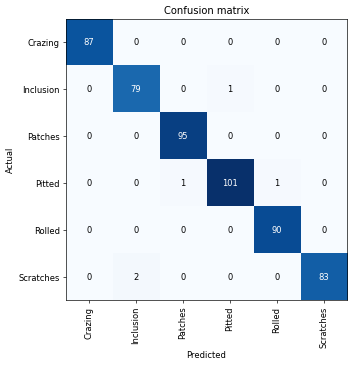

In [ ]:
from sklearn import metrics
start_time=time.time()
interp = ClassificationInterpretation.from_learner(learn)

print("inference_time"," ",time.time()-start_time)
interp.plot_confusion_matrix(figsize=(6,6), dpi=60)


Recall 0.9907588520845231
Precision 0.990683173791834
f1_Score 0.9907210114929675


ROC area is 0.998804347826087


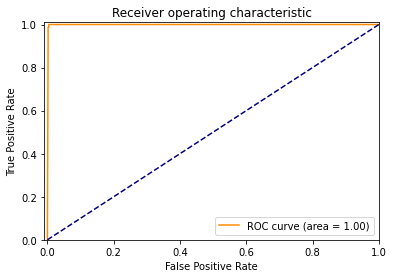

In [ ]:
conf=interp.confusion_matrix()
recall = np.diag(conf) / np.sum(conf, axis = 1)
precision = np.diag(conf) / np.sum(conf, axis = 0)
recall=np.mean(recall)
precision=np.mean(precision)
print("Recall",recall)
print("Precision",precision)
f1=2*((precision*recall)/(precision+recall))
print("f1_Score",f1)
from sklearn import metrics
preds,y, loss = learn.get_preds(with_loss=True)
from sklearn.metrics import roc_curve, auc
# probs from log preds
probs = np.exp(preds[:,1])
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y, probs, pos_label=1)

# Compute ROC area
roc_auc = auc(fpr, tpr)
print('ROC area is {0}'.format(roc_auc))
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

**Training with DenseNet**

In [ ]:
learn = cnn_learner(data, models.densenet121, metrics=accuracy)


Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


In [ ]:
import time
start_time = time.time()
learn.fit_one_cycle(2,1e-01)
print("--- %s seconds ---" % (time.time() - start_time))


epoch,train_loss,valid_loss,accuracy,time
0,1.995577,128.273026,0.194444,13:53
1,1.328247,0.016918,0.992593,13:16


--- 1629.7652134895325 seconds ---


inference_time   96.46915626525879


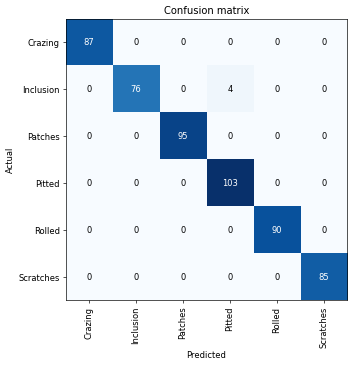

In [ ]:
from sklearn import metrics
start_time=time.time()
interp = ClassificationInterpretation.from_learner(learn)

print("inference_time"," ",time.time()-start_time)
interp.plot_confusion_matrix(figsize=(6,6), dpi=60)


Recall 0.9916666666666667
Precision 0.9937694704049843
f1_Score 0.9927169549811059


ROC area is 0.9997554347826086


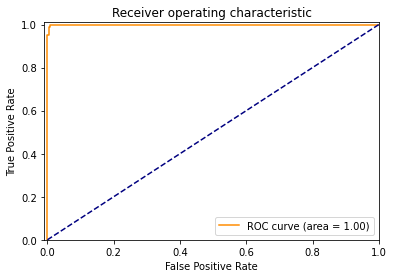

In [ ]:
conf=interp.confusion_matrix()
recall = np.diag(conf) / np.sum(conf, axis = 1)
precision = np.diag(conf) / np.sum(conf, axis = 0)
recall=np.mean(recall)
precision=np.mean(precision)
print("Recall",recall)
print("Precision",precision)
f1=2*((precision*recall)/(precision+recall))
print("f1_Score",f1)
from sklearn import metrics
preds,y, loss = learn.get_preds(with_loss=True)
from sklearn.metrics import roc_curve, auc
# probs from log preds
probs = np.exp(preds[:,1])
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y, probs, pos_label=1)

# Compute ROC area
roc_auc = auc(fpr, tpr)
print('ROC area is {0}'.format(roc_auc))
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

**Training_With_VGG NET**

In [ ]:
learn = cnn_learner(data, models.vgg16_bn, metrics=accuracy)
import time
start_time = time.time()
learn.fit_one_cycle(2,1e-01)
print("--- %s seconds ---" % (time.time() - start_time))


Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth


epoch,train_loss,valid_loss,accuracy,time
0,2.249918,26.711279,0.294444,30:48
1,1.806637,0.367147,0.962963,30:47


--- 3695.854559659958 seconds ---


inference_time   299.03793025016785


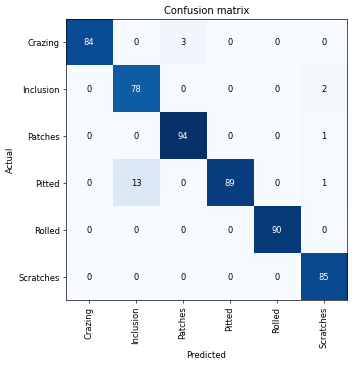

In [ ]:
from sklearn import metrics
start_time=time.time()
interp = ClassificationInterpretation.from_learner(learn)

print("inference_time"," ",time.time()-start_time)
interp.plot_confusion_matrix(figsize=(6,6), dpi=60)



Recall 0.9656780992487916
Precision 0.9635452003110987
f1_Score 0.964610470741241


ROC area is 0.9830434782608697


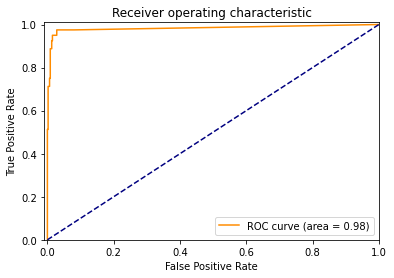

In [ ]:
conf=interp.confusion_matrix()
recall = np.diag(conf) / np.sum(conf, axis = 1)
precision = np.diag(conf) / np.sum(conf, axis = 0)
recall=np.mean(recall)
precision=np.mean(precision)
print("Recall",recall)
print("Precision",precision)
f1=2*((precision*recall)/(precision+recall))
print("f1_Score",f1)
from sklearn import metrics
preds,y, loss = learn.get_preds(with_loss=True)
from sklearn.metrics import roc_curve, auc
# probs from log preds
probs = np.exp(preds[:,1])
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y, probs, pos_label=1)

# Compute ROC area
roc_auc = auc(fpr, tpr)
print('ROC area is {0}'.format(roc_auc))
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

**Training  With SqueezeNet**

In [ ]:
learn = cnn_learner(data, models.squeezenet1_0, metrics=accuracy)
import time
start_time = time.time()
learn.fit_one_cycle(2,1e-01)
print("--- %s seconds ---" % (time.time() - start_time))


Downloading: "https://download.pytorch.org/models/squeezenet1_0-a815701f.pth" to /root/.cache/torch/hub/checkpoints/squeezenet1_0-a815701f.pth


epoch,train_loss,valid_loss,accuracy,time
0,1.173481,0.405517,0.970370,01:54
1,0.890839,0.129423,0.990741,01:54


--- 228.48040580749512 seconds ---


inference_time   34.35158920288086


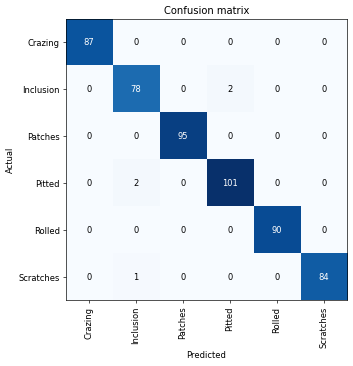

In [ ]:
from sklearn import metrics
start_time=time.time()
interp = ClassificationInterpretation.from_learner(learn)

print("inference_time"," ",time.time()-start_time)
interp.plot_confusion_matrix(figsize=(6,6), dpi=60)



Recall 0.9906363030649153
Precision 0.9905909145391346
f1_Score 0.9906136082821153


ROC area is 0.9973641304347827


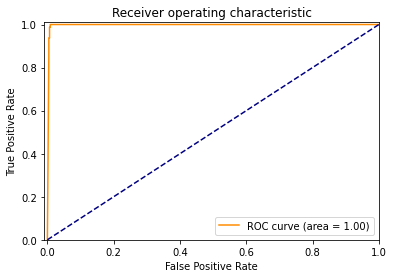

In [ ]:
conf=interp.confusion_matrix()
recall = np.diag(conf) / np.sum(conf, axis = 1)
precision = np.diag(conf) / np.sum(conf, axis = 0)
recall=np.mean(recall)
precision=np.mean(precision)
print("Recall",recall)
print("Precision",precision)
f1=2*((precision*recall)/(precision+recall))
print("f1_Score",f1)
from sklearn import metrics
preds,y, loss = learn.get_preds(with_loss=True)
from sklearn.metrics import roc_curve, auc
# probs from log preds
probs = np.exp(preds[:,1])
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y, probs, pos_label=1)

# Compute ROC area
roc_auc = auc(fpr, tpr)
print('ROC area is {0}'.format(roc_auc))
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
pandoc set to manually installed.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa
Suggested packages:
  fonts-noto apache2 | lighttpd | httpd poppler-utils ghostscript
  fonts-japanese-mincho | fonts-ipa

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd -

/content


In [ ]:
cd /

/


In [ ]:
%cd /content/drive/'My Drive'/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [ ]:
!jupyter nbconvert --to PDF "Steel_Surface_Defect.ipynb"

[NbConvertApp] Converting notebook Steel_Surface_Defect.ipynb to PDF
[NbConvertApp] Support files will be in Steel_Surface_Defect_files/
[NbConvertApp] Making directory ./Steel_Surface_Defect_files
[NbConvertApp] Making directory ./Steel_Surface_Defect_files
[NbConvertApp] Making directory ./Steel_Surface_Defect_files
[NbConvertApp] Making directory ./Steel_Surface_Defect_files
[NbConvertApp] Making directory ./Steel_Surface_Defect_files
[NbConvertApp] Making directory ./Steel_Surface_Defect_files
[NbConvertApp] Making directory ./Steel_Surface_Defect_files
[NbConvertApp] Making directory ./Steel_Surface_Defect_files
[NbConvertApp] Making directory ./Steel_Surface_Defect_files
[NbConvertApp] Making directory ./Steel_Surface_Defect_files
[NbConvertApp] Making directory ./Steel_Surface_Defect_files
[NbConvertApp] Writing 90178 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u'./notebook.tex', '-quiet']
[NbConvertApp] Running bibtex